<a href="https://colab.research.google.com/github/EduardoJablinski/IA_1_03-11/blob/main/Checkpoint_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: green; font-size: 36px; font-weight: bold;'>Regressão Linear</h1>

## Importando bibliotecas



In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Dataset

<hr>

### Fonte:

### Descrição do conjunto de dados:

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste exercício será criar um modelo de...</p>


### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
</ul>

## Leitura dos dados

In [4]:
dados = pd.read_csv('FuelConsumptionCo2.csv', sep=',')

## Visualizar os dados

In [5]:
dados.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Verificando o tamanho do dataset

In [6]:
dados.shape

(1067, 13)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [ ]:
dados.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [ ]:
dados.corr().round(3)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000,0.934,0.832,0.779,0.819,-0.809,0.874
CYLINDERS,NaN,0.934,1.000,0.796,0.725,0.777,-0.770,0.850
FUELCONSUMPTION_CITY,NaN,0.832,0.796,1.000,0.966,0.996,-0.936,0.898
FUELCONSUMPTION_HWY,NaN,0.779,0.725,0.966,1.000,0.986,-0.894,0.862
FUELCONSUMPTION_COMB,NaN,0.819,0.777,0.996,0.986,1.000,-0.928,0.892
FUELCONSUMPTION_COMB_MPG,NaN,-0.809,-0.770,-0.936,-0.894,-0.928,1.000,-0.906
CO2EMISSIONS,NaN,0.874,0.850,0.898,0.862,0.892,-0.906,1.000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y) - Target</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

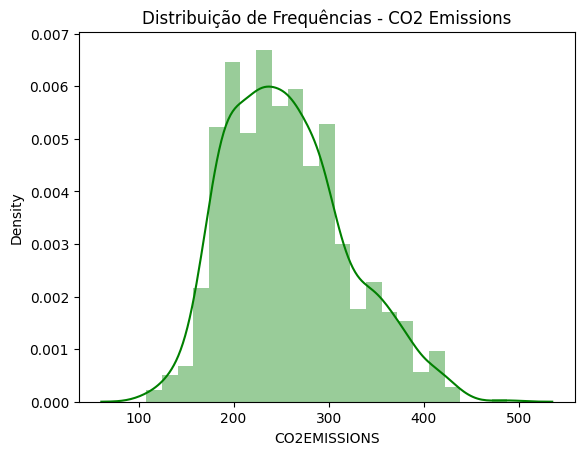

In [ ]:
# prompt: histograma da coluna 'consumo'

sns.distplot(dados['CO2EMISSIONS'], color='green')
plt.title('Distribuição de Frequências - CO2 Emissions')
plt.show()


In [ ]:
# prompt: padronize a coluna 'consumo' de -10 a 10 com Standard Scale

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados['CO2EMISSIONS'] = scaler.fit_transform(dados['CO2EMISSIONS'].values.reshape(-1, 1))

# Verificando os dados
dados.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,-0.950840
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,-0.556161
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,-1.898070
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,-0.019397
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,-0.193056


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='CO2EMISSIONS', ylabel='Emissão de CO2'>

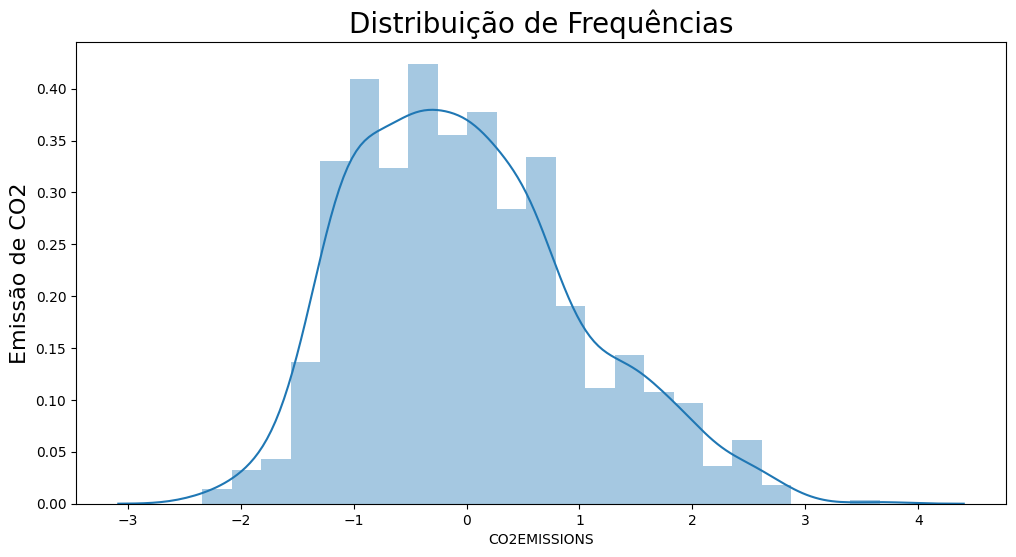

In [ ]:
# Gerando um histograma para a coluna "consumo"
ax = sns.distplot(dados['CO2EMISSIONS'])

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Emissão de CO2', fontsize=16)

ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

In [ ]:
# ax = sns.pairplot(dados)

## Plotando o pairplot fixando somente uma variável no eixo y

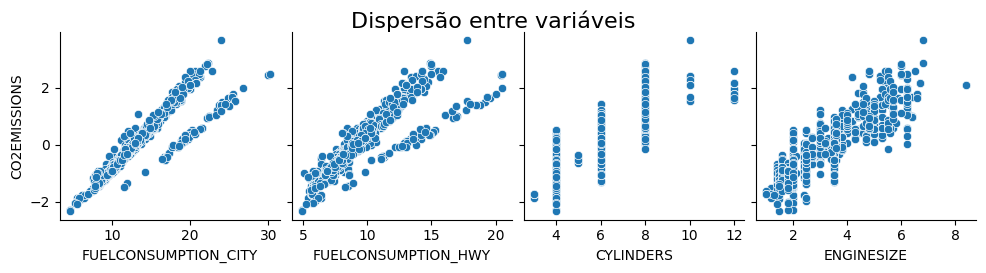

In [ ]:
# Eixo y: Variável Dependente
# Eixo X: Variáveis Independentes.
ax = sns.pairplot(dados, y_vars='CO2EMISSIONS', x_vars=['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'CYLINDERS', 'ENGINESIZE'])
ax.fig.suptitle('Dispersão entre variáveis', fontsize=16, y=1.05)
ax


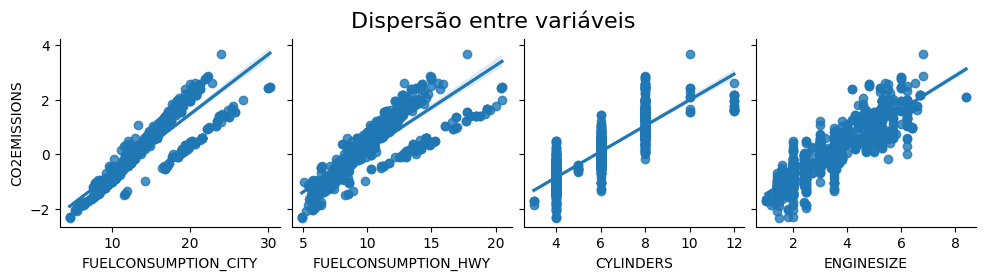

In [ ]:
# Estimando a reta de regressão com "reg".
ax = sns.pairplot(dados, y_vars='CO2EMISSIONS', x_vars=['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'CYLINDERS', 'ENGINESIZE'], kind='reg')
ax.fig.suptitle('Dispersão entre variáveis', fontsize=16, y=1.08)
ax

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regressão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [11]:
# Variável dependente y
y = dados['CO2EMISSIONS']
y

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [12]:
X = dados[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'CYLINDERS', 'ENGINESIZE']]
X

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CYLINDERS,ENGINESIZE
0,9.9,6.7,4,2.0
1,11.2,7.7,4,2.4
2,6.0,5.8,4,1.5
3,12.7,9.1,6,3.5
4,12.1,8.7,6,3.5
...,...,...,...,...
1062,13.4,9.8,6,3.0
1063,13.2,9.5,6,3.2
1064,13.4,9.8,6,3.0
1065,12.9,9.3,6,3.2


## Criando os datasets de treino e de teste

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CYLINDERS,ENGINESIZE
69,18.8,11.5,12,6.0
697,9.3,7.6,4,2.0
705,8.4,6.1,4,2.5
521,11.6,9.3,4,2.4
474,23.3,16.1,8,6.2
...,...,...,...,...
847,9.3,7.9,4,1.6
715,8.8,6.2,4,2.5
905,15.1,9.7,8,4.8
235,12.2,8.6,4,2.4


## Instanciando a classe *LinearRegression()*

In [14]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)


In [15]:
modelo.fit(X_train, y_train)

LinearRegression()

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"



In [16]:
y_previsto = modelo.predict(X_test)
y_previsto

array([256.6396968 , 194.64759499, 198.90190106, 185.14184055,
       307.58322338, 223.02446141, 187.36539485, 194.1308721 ,
       235.58760459, 198.38517816, 218.59484621, 260.62178454,
       201.78722852, 363.19994185, 201.42441515, 193.12416777,
       193.56747509, 314.21526282, 261.91053874, 216.42655575,
       439.44623005, 216.04532111, 255.3706057 , 258.4900671 ,
       278.25491648, 240.76660967, 162.3723519 , 287.86477858,
       187.15471011, 231.33864039, 229.69961316, 367.18202959,
       247.21594766, 359.93191279, 285.02515295, 315.53048894,
       350.21698497, 181.06791594, 341.61858641, 257.40189655,
       240.76660967, 371.85534074, 214.81183075, 257.90170953,
       256.56752304, 202.30395142, 190.34785664, 161.52029059,
       181.77663275, 250.32708888, 189.93988052, 334.86894092,
       327.19145444, 344.12187061, 211.78269485, 269.13066622,
       208.71644685, 286.14784608, 263.33478119, 185.9393715 ,
       209.73298272, 237.30631715, 208.64303127, 195.87

In [17]:
y_test

133    274
340    200
948    196
704    161
661    320
      ... 
538    294
106    292
923    368
23     230
920    262
Name: CO2EMISSIONS, Length: 321, dtype: int64

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [18]:
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

R² = 0.87


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [19]:
X_test[0:1]

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CYLINDERS,ENGINESIZE
133,13.6,9.8,6,3.0


In [22]:
entrada = X_test[0:1]
entrada

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CYLINDERS,ENGINESIZE
133,13.6,9.8,6,3.0


## Gerando previsão pontual

In [23]:
modelo.predict(entrada)[0].round(3)

256.64

## Criando um simulador simples

In [24]:
FUELCONSUMPTION_CITY=14.3
FUELCONSUMPTION_HWY=10.2
CYLINDERS=6
ENGINESIZE=3.0
entrada=[[FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, CYLINDERS, ENGINESIZE]]

print(f'{modelo.predict(entrada)[0]:.2f}')

262.15


# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: title={'center': 'Previsão x Real'}, xlabel='Emissão de CO2 - Previsão', ylabel='Emissão de CO2 - Real'>

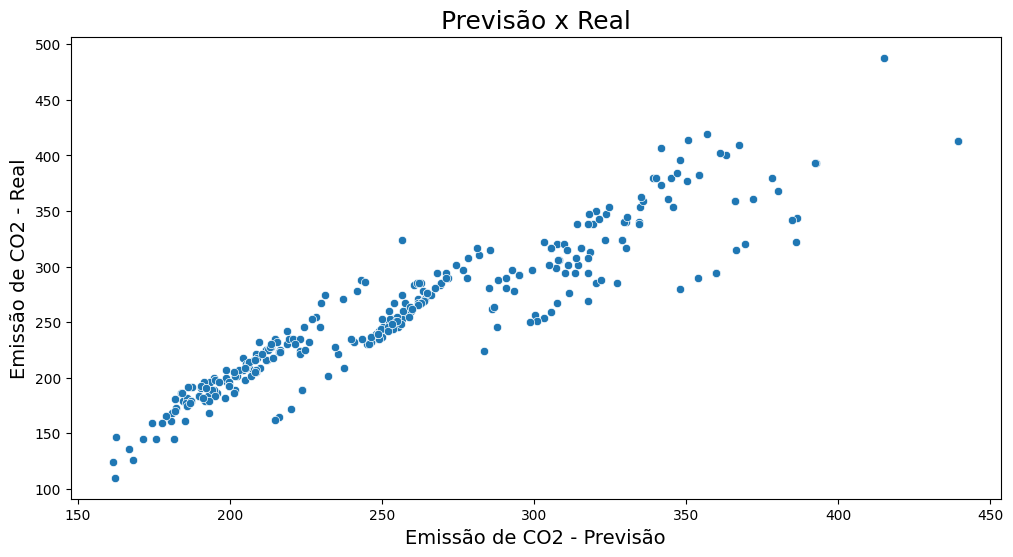

In [25]:
ax = sns.scatterplot(x=y_previsto, y=y_test)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão x Real', fontsize=18)
ax.set_xlabel('Emissão de CO2 - Previsão', fontsize=14)
ax.set_ylabel('Emissão de CO2 - Real', fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição das variáveis explicativas FUELCONSUMPTION_CITY e FUELCONSUMPTION_HWY pelas FUELCONSUMPTION_COMB e FUELCONSUMPTION_COMB_MPG

In [27]:
X2 = dados[['FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CYLINDERS', 'ENGINESIZE']]


## Criando os datasets de treino e de teste

In [28]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

## Instanciando a classe *LinearRegression()*

In [29]:
modelo_2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [30]:
modelo_2.fit(X2_train, y2_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [34]:
print('Modelo com FUELCONSUMPTION_COMB e FUELCONSUMPTION_COMB_MPG')
print(f'R² = {modelo_2.score(X2_train, y2_train).round(2)}')

Modelo com FUELCONSUMPTION_COMB e FUELCONSUMPTION_COMB_MPG
R² = 0.89


In [35]:
print('Modelo com FUELCONSUMPTION_CITY e FUELCONSUMPTION_HWY')
print(f'R² = {modelo.score(X_train, y_train).round(2)}')

Modelo com FUELCONSUMPTION_CITY e FUELCONSUMPTION_HWY
R² = 0.86


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [36]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [37]:
print('Modelo com FUELCONSUMPTION_COMB e FUELCONSUMPTION_COMB_MPG')
print(f'R² = {metrics.r2_score(y2_test, y_previsto_2).round(2)}')

Modelo com FUELCONSUMPTION_COMB e FUELCONSUMPTION_COMB_MPG
R² = 0.88


In [38]:
print('Modelo com FUELCONSUMPTION_CITY e FUELCONSUMPTION_HWY')
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

Modelo com FUELCONSUMPTION_CITY e FUELCONSUMPTION_HWY
R² = 0.87


# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

O erro quadrático médio (MSE — do inglês Mean Squared Error) é uma métrica que calcula a média de diferença entre o valor predito com o real, como a métrica MAE.

$$MSE(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{RMSE}$ mais baixo.

$$\sqrt{RMSE(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [39]:
MSE_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
RMSE_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([MSE_2, RMSE_2, R2_2], ['MSE', 'RMSE', 'R²'], columns=['Métricas'])

,Métricas
MSE,517.16
RMSE,22.74
R²,0.88


## Obtendo métricas para o modelo com Temperatura Máxima

In [40]:
MSE = metrics.mean_squared_error(y_test, y_previsto).round(2)
MSE

565.2

In [41]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
RMSE

23.77

In [42]:
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([MSE, RMSE, R2], ['MSE', 'RMSE', 'R²'], columns=['Métricas'])

,Métricas
MSE,565.20
RMSE,23.77
R²,0.87
